# 프로젝트 실습 #3: 건조구동장치

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [7]:
raw_df1 = pd.read_csv('./data/drying_actuator1.csv')
raw_df2 = pd.read_csv('./data/drying_actuator2.csv')
print(raw_df1.shape)
print(raw_df2.shape)

(1709056, 2)
(1709056, 2)


In [8]:
raw_df = pd.concat([raw_df1, raw_df2], axis=0)
raw_df

,Date,Sensor
0,2020-11-07T00:11:11.302000+00:00,0.000000
1,2020-11-07T00:11:11.302000+00:00,0.000000
2,2020-11-07T00:11:11.302000+00:00,0.000000
3,2020-11-07T00:11:11.302000+00:00,0.000000
4,2020-11-07T00:11:11.302000+00:00,0.000000
...,...,...
1709051,2021-11-20T07:56:37.294000+00:00,1.542188
1709052,2021-11-20T07:56:37.294000+00:00,-0.242188
1709053,2021-11-20T07:56:37.294000+00:00,-0.140625
1709054,2021-11-20T07:56:37.294000+00:00,0.328125


## 2. 데이터 탐색

In [4]:
raw_df.shape

(3418112, 2)

In [5]:
raw_df.shape

(3418112, 2)

In [6]:
raw_df.isnull().sum()

Date      0
Sensor    0
dtype: int64

In [7]:
raw_df['Date'].value_counts()

2020-11-18T05:14:23.408000+00:00    2048
2020-11-18T05:15:55.289000+00:00    2048
2021-11-18T05:14:23.408000+00:00    2048
2021-11-18T05:15:55.289000+00:00    2048
2020-11-07T00:11:11.302000+00:00    1024
                                    ... 
2020-11-15T21:03:50.757000+00:00    1024
2020-11-15T21:14:47.905000+00:00    1024
2020-11-15T21:25:53.654000+00:00    1024
2020-11-15T21:38:59.910000+00:00    1024
2021-11-20T07:56:37.294000+00:00    1024
Name: Date, Length: 3334, dtype: int64

In [8]:
print(raw_df['Date'].nunique())

3334


## 3. 데이터 전처리 및 EDA

In [9]:
raw_df['Date'] = raw_df['Date'].str[2:16]
raw_df.head()

,Date,Sensor
0,20-11-07T00:11,0.0
1,20-11-07T00:11,0.0
2,20-11-07T00:11,0.0
3,20-11-07T00:11,0.0
4,20-11-07T00:11,0.0


In [10]:
raw_df['index'] = raw_df.groupby('Date').cumcount() + 1
raw_df.head()

,Date,Sensor,index
0,20-11-07T00:11,0.0,1
1,20-11-07T00:11,0.0,2
2,20-11-07T00:11,0.0,3
3,20-11-07T00:11,0.0,4
4,20-11-07T00:11,0.0,5


In [14]:
raw_df['index'].value_counts()

1       3334
514     3334
676     3334
677     3334
678     3334
        ... 
1371       4
1372       4
1373       4
1374       4
2048       4
Name: index, Length: 2048, dtype: int64

In [38]:
counts = raw_df.groupby(raw_df['Date']).count()
curr_date = counts[counts['Sensor'] == 1024].index
flt_df = raw_df[raw_df['Date'].isin(curr_date)]
flt_df.head()

,Date,Sensor,index
0,2020-11-07T00:11:11.302000+00:00,0.0,1
1,2020-11-07T00:11:11.302000+00:00,0.0,2
2,2020-11-07T00:11:11.302000+00:00,0.0,3
3,2020-11-07T00:11:11.302000+00:00,0.0,4
4,2020-11-07T00:11:11.302000+00:00,0.0,5


In [39]:
df_arr = flt_df.pivot(index='Date', columns='index', values='Sensor')
df_arr.head()

index,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07T00:11:11.302000+00:00,0.000000,0.000000,0.00000,0.000000,0.000000,-0.007812,-0.015625,-0.023438,-0.031250,0.00000,...,-0.023438,-0.03125,-0.023438,0.000000,0.000000,-0.031250,0.000000,-0.031250,0.000000,0.000000
2020-11-07T00:22:18.460000+00:00,-0.007812,0.000000,-0.03125,0.000000,-0.007812,-0.015625,-0.007812,-0.031250,-0.023438,0.00000,...,-0.031250,0.03125,-0.031250,-0.007812,0.000000,-0.023438,-0.023438,0.000000,0.000000,-0.031250
2020-11-07T00:33:16.582000+00:00,0.000000,-0.007812,-0.03125,-0.023438,0.000000,0.000000,-0.031250,-0.023438,0.000000,-0.03125,...,-0.023438,0.00000,-0.031250,0.000000,-0.023438,-0.031250,0.000000,-0.023438,-0.023438,0.000000
2020-11-07T00:43:39.275000+00:00,0.000000,-0.007812,0.00000,-0.007812,-0.031250,0.000000,-0.031250,0.000000,0.000000,0.00000,...,-0.007812,-0.03125,0.000000,0.000000,0.000000,-0.031250,0.000000,-0.007812,-0.039062,-0.015625
2020-11-07T00:54:46.791000+00:00,0.000000,0.007812,0.00000,0.000000,0.000000,-0.031250,0.000000,0.000000,-0.007812,0.00000,...,-0.007812,0.00000,0.000000,0.000000,0.000000,0.000000,-0.007812,0.000000,0.000000,-0.023438


In [40]:
df_arr.shape

(3330, 1024)

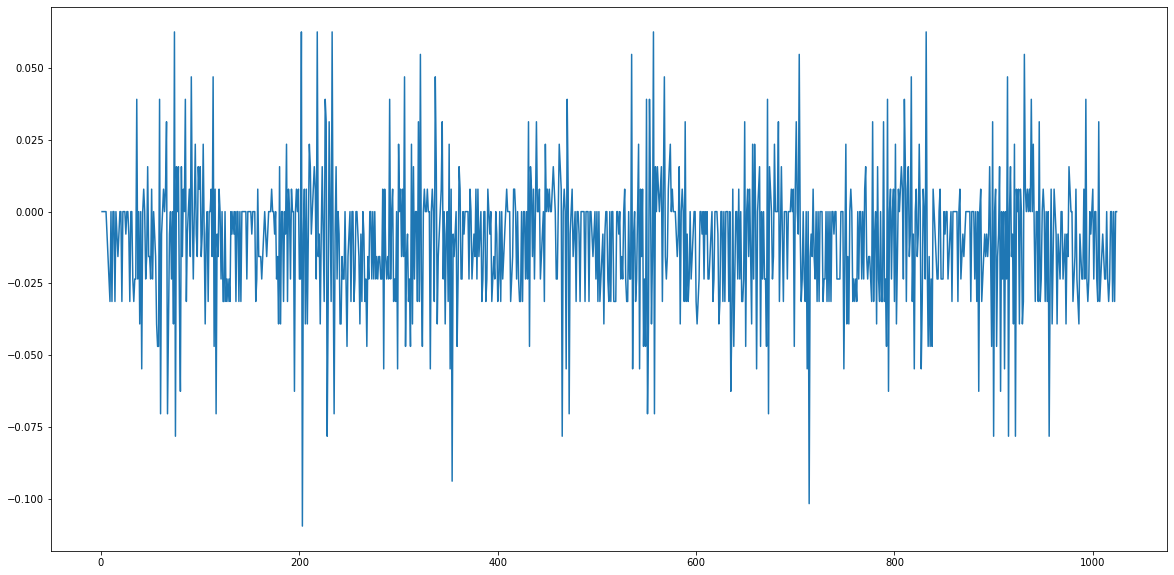

In [41]:
# Signal 시각화
plt.figure(figsize=(20, 10))
plt.plot(df_arr.iloc[0])
plt.show()

## 4. PCA Anomaly Detection

### 4-1 데이터 전처리 변환

In [42]:
df_1 = pd.DataFrame({
    "mean": df_arr.mean(axis = 1), 
    "std" : df_arr.std(axis = 1),
    "q0" : df_arr.min(axis = 1),
    "q1" : df_arr.quantile(0.25, axis = 1),
    "q2" : df_arr.median(axis = 1),
    "q3" : df_arr.quantile(0.75, axis = 1),
    "q4" : df_arr.max(axis = 1),
    "minmax" : df_arr.max(axis = 1) - df_arr.min(axis = 1)})
df_1

,mean,std,q0,q1,q2,q3,q4,minmax
Date,,,,,,,,
2020-11-07T00:11:11.302000+00:00,-0.010025,0.022234,-0.109375,-0.023438,-0.007812,0.000000,0.062500,0.171875
2020-11-07T00:22:18.460000+00:00,-0.010651,0.021256,-0.093750,-0.023438,-0.007812,0.000000,0.101562,0.195312
2020-11-07T00:33:16.582000+00:00,-0.010963,0.022170,-0.109375,-0.023438,-0.007812,0.000000,0.093750,0.203125
2020-11-07T00:43:39.275000+00:00,-0.010521,0.022580,-0.101562,-0.023438,-0.007812,0.000000,0.085938,0.187500
2020-11-07T00:54:46.791000+00:00,-0.010735,0.023347,-0.117188,-0.023438,-0.007812,0.000000,0.109375,0.226562
...,...,...,...,...,...,...,...,...
2021-11-20T07:07:33.192000+00:00,0.018031,1.009635,-4.516406,-0.398438,-0.037891,0.414062,6.242188,10.758594
2021-11-20T07:20:02.823000+00:00,0.015554,1.085307,-4.920312,-0.414062,0.000000,0.437500,5.140625,10.060937
2021-11-20T07:32:31.890000+00:00,0.017804,1.140123,-4.663281,-0.460938,0.007812,0.437500,5.617969,10.281250


In [43]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_scaled = std.fit_transform(df_1)

### 4-2 PCA Score

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components = 2)
pca_score = pca.fit_transform(df_scaled)

In [46]:
pca_score

array([[-2.5651139 , -0.29457297],
       [-2.57102022, -0.26947427],
       [-2.57310291, -0.25664215],
       ...,
       [ 5.33479495,  0.86163026],
       [ 3.89590434,  1.49894498],
       [ 4.59690506,  1.62648073]])

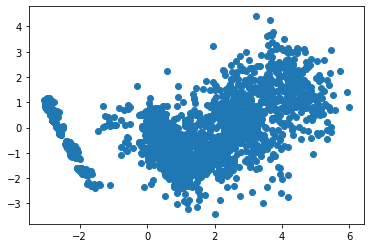

In [47]:
plt.scatter(pca_score[:,0], pca_score[:,1])

### 4-2. Mahalnobis Score

In [48]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [49]:
df_hat = pca.inverse_transform(pca_score)
diff = pd.DataFrame(np.square(df_scaled - df_hat))
anomaly_score1 = diff.sum(axis=1)
anomaly_score1

0       0.266288
1       0.267263
2       0.267286
3       0.265767
4       0.274899
          ...   
3325    3.592795
3326    0.391397
3327    0.590831
3328    0.116110
3329    2.403506
Length: 3330, dtype: float64

In [50]:
robust_cov = MinCovDet().fit(pca_score)
anomaly_score2 = robust_cov.mahalanobis(pca_score)
anomaly_score2

array([ 3.02831926,  2.8864913 ,  2.81278922, ..., 65.91294474,
       64.34406015, 79.95224751])

### 4-3. Score 시각화

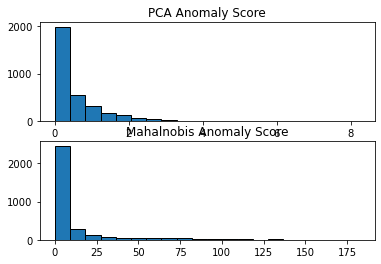

In [51]:
fig,ax=plt.subplots(2,1)

ax[0].hist(anomaly_score1, edgecolor = "black", bins = 20)
ax[0].set_title('PCA Anomaly Score')

ax[1].hist(anomaly_score2, edgecolor = "black", bins = 20)
ax[1].set_title('Mahalnobis Anomaly Score')

plt.show()

### 4-4. Anomaly Detection 및 시각화

In [57]:
detection = pd.DataFrame({"Detection": 
                    np.where((anomaly_score1 > 3) | (anomaly_score2 > 130), 
                    "Anomaly", "Normal")})

pca_anomaly = pd.concat([pd.DataFrame(pca_score, columns=['PC1','PC2']), detection], axis = 1)
groups = pca_anomaly.groupby('Detection')
pca_anomaly

,PC1,PC2,Detection
0,-2.565114,-0.294573,Normal
1,-2.571020,-0.269474,Normal
2,-2.573103,-0.256642,Normal
3,-2.569351,-0.274846,Normal
4,-2.558639,-0.256872,Normal
...,...,...,...
3325,4.430268,3.146538,Anomaly
3326,4.913262,1.252811,Normal
3327,5.334795,0.861630,Normal
3328,3.895904,1.498945,Normal


In [58]:
pca_anomaly['Detection'].value_counts()

Normal     3251
Anomaly      79
Name: Detection, dtype: int64

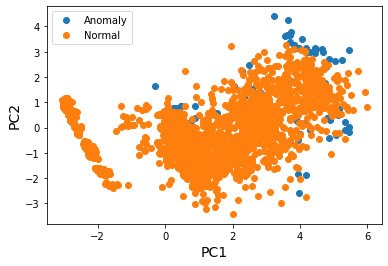

In [59]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PC1'],
            group['PC2'], 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=10, loc='upper left')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

plt.show()

## 6. Local Outlier Factor

In [64]:
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors = 20)
LOF.fit_predict(df_scaled)

array([1, 1, 1, ..., 1, 1, 1])

## 7. 1-Class SVM

In [65]:
from sklearn.svm import OneClassSVM

ocs = OneClassSVM(gamma='auto').fit(df_scaled)
ocs.predict(df_scaled)

array([-1, -1,  1, ..., -1, -1, -1])

In [67]:
ocs.score_samples(df_scaled)

array([531.14244502, 531.97275773, 532.45287807, ..., 336.98628677,
       468.78815267, 339.25229424])